In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('./data/train.csv')
df.drop(['index','occyp_type'], axis = 1, inplace = True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [3]:
df.gender = df.gender.replace({'F' : 0, 'M' : 1})
df.car = df.car.replace({'N' : 0, 'Y' : 1})
df.reality = df.reality.replace({'N' : 0, 'Y' : 1})
df.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0


In [4]:
df['age'] = df.DAYS_BIRTH.apply(lambda x : -x // 365)
df.DAYS_EMPLOYED = (-1) * df.DAYS_EMPLOYED 
df.loc[(df.DAYS_EMPLOYED < 0), 'DAYS_EMPLOYED'] = 0
df.begin_month = (-1) * df.begin_month

# income_total에 로그스케일 적용
df.income_total = np.log1p(df.income_total)

In [5]:
y = df.credit
X = df.drop(['credit', 'DAYS_BIRTH'], axis = 1)

In [6]:
X

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,age
0,0,0,0,0,12.218500,Commercial associate,Higher education,Married,Municipal apartment,4709,1,0,0,0,2.0,6.0,38
1,0,0,1,1,12.419170,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1540,1,0,0,1,3.0,5.0,31
2,1,1,1,0,13.017005,Working,Higher education,Married,House / apartment,4434,1,0,1,0,2.0,22.0,52
3,0,0,1,0,12.218500,Commercial associate,Secondary / secondary special,Married,House / apartment,2092,1,0,1,0,2.0,37.0,41
4,0,1,1,0,11.967187,State servant,Higher education,Married,House / apartment,2105,1,0,0,0,2.0,26.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,12.323860,State servant,Secondary / secondary special,Married,House / apartment,1984,1,0,0,0,4.0,2.0,33
26453,0,0,1,1,12.100718,Working,Higher education,Separated,House / apartment,2475,1,0,0,0,2.0,47.0,41
26454,0,1,0,0,12.586223,Working,Secondary / secondary special,Civil marriage,With parents,2015,1,0,0,0,2.0,25.0,27
26455,1,0,1,0,12.049425,Working,Incomplete higher,Single / not married,House / apartment,107,1,0,0,0,1.0,59.0,27


In [7]:
X.DAYS_EMPLOYED.min()

0

In [8]:
numeric_features = ['child_num', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'age']
numeric_transformer = StandardScaler()

categorical_features = ['income_type', 'edu_type', 'family_type', 'house_type']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown = 'ignore')

# label_features = ['credit']
# label_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], remainder='passthrough'
                )

In [9]:
preprocessor.fit(X)
scaled_X = preprocessor.transform(X)

In [10]:
scaled_X

array([[-0.5735993 ,  1.05922745, -0.21473529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76452932, -0.27784934,  0.87613484, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5735993 ,  0.94319838, -0.21473529, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.5735993 , -0.0774355 , -0.21473529, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5735993 , -0.88246627, -1.30560543, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5735993 , -0.50020323, -0.21473529, ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
scaled_X = pd.DataFrame(scaled_X)
y = pd.DataFrame(y)

## scaled_X, y 이용

## Modeling

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing

In [13]:
model = models.Sequential()
model.add(layers.Dense(input_dim=34, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=3, activation='softmax'))

In [14]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               8960      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0

In [16]:
y = utils.to_categorical(y)

In [17]:
y.shape

(26457, 3)

In [18]:
history1 = model.fit(scaled_X, y, batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/10
212/212 [==============================] - 2s 4ms/step - loss: 0.9557 - accuracy: 0.6122 - val_loss: 0.8952 - val_accuracy: 0.6466
Epoch 2/10
212/212 [==============================] - 1s 3ms/step - loss: 0.8809 - accuracy: 0.6487 - val_loss: 0.8598 - val_accuracy: 0.6606
Epoch 3/10
212/212 [==============================] - 1s 3ms/step - loss: 0.8607 - accuracy: 0.6557 - val_loss: 0.8557 - val_accuracy: 0.6493
Epoch 4/10
212/212 [==============================] - 1s 3ms/step - loss: 0.8486 - accuracy: 0.6658 - val_loss: 0.8513 - val_accuracy: 0.6623
Epoch 5/10
212/212 [==============================] - 1s 4ms/step - loss: 0.8404 - accuracy: 0.6673 - val_loss: 0.8536 - val_accuracy: 0.6548
Epoch 6/10
212/212 [==============================] - 1s 6ms/step - loss: 0.8401 - accuracy: 0.6678 - val_loss: 0.8417 - val_accuracy: 0.6665
Epoch 7/10
212/212 [==============================] - 1s 4ms/step - loss: 0.8326 - accuracy: 0.6696 - val_loss: 0.8581 - val_accuracy: 0.6417
Epoch 

In [19]:
history2 = model.fit(scaled_X, y, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
212/212 [==============================] - 1s 4ms/step - loss: 0.8190 - accuracy: 0.6741 - val_loss: 0.8429 - val_accuracy: 0.6625
Epoch 2/100
212/212 [==============================] - 1s 4ms/step - loss: 0.8155 - accuracy: 0.6745 - val_loss: 0.8390 - val_accuracy: 0.6576
Epoch 3/100
212/212 [==============================] - 1s 4ms/step - loss: 0.8151 - accuracy: 0.6755 - val_loss: 0.8318 - val_accuracy: 0.6740
Epoch 4/100
212/212 [==============================] - 1s 4ms/step - loss: 0.8106 - accuracy: 0.6779 - val_loss: 0.8332 - val_accuracy: 0.6631
Epoch 5/100
212/212 [==============================] - 1s 4ms/step - loss: 0.8078 - accuracy: 0.6764 - val_loss: 0.8392 - val_accuracy: 0.6740
Epoch 6/100
212/212 [==============================] - 1s 7ms/step - loss: 0.8037 - accuracy: 0.6776 - val_loss: 0.8396 - val_accuracy: 0.6612
Epoch 7/100
212/212 [==============================] - 1s 4ms/step - loss: 0.8006 - accuracy: 0.6777 - val_loss: 0.8237 - val_accuracy: 0.6780

Epoch 58/100
212/212 [==============================] - 1s 4ms/step - loss: 0.6865 - accuracy: 0.7185 - val_loss: 0.8056 - val_accuracy: 0.6740
Epoch 59/100
212/212 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.7192 - val_loss: 0.7978 - val_accuracy: 0.6776
Epoch 60/100
212/212 [==============================] - 2s 10ms/step - loss: 0.6842 - accuracy: 0.7205 - val_loss: 0.8018 - val_accuracy: 0.6818
Epoch 61/100
212/212 [==============================] - 2s 10ms/step - loss: 0.6848 - accuracy: 0.7195 - val_loss: 0.8072 - val_accuracy: 0.6750
Epoch 62/100
212/212 [==============================] - 1s 6ms/step - loss: 0.6871 - accuracy: 0.7176 - val_loss: 0.8058 - val_accuracy: 0.6725
Epoch 63/100
212/212 [==============================] - 2s 10ms/step - loss: 0.6796 - accuracy: 0.7182 - val_loss: 0.8036 - val_accuracy: 0.6720
Epoch 64/100
212/212 [==============================] - 2s 10ms/step - loss: 0.6809 - accuracy: 0.7219 - val_loss: 0.8043 - val_accur

In [20]:
history3 = model.fit(scaled_X, y, batch_size=100, epochs=200, validation_split=0.2)

Epoch 1/200
212/212 [==============================] - 1s 3ms/step - loss: 0.6370 - accuracy: 0.7341 - val_loss: 0.8089 - val_accuracy: 0.6769
Epoch 2/200
212/212 [==============================] - 1s 3ms/step - loss: 0.6411 - accuracy: 0.7366 - val_loss: 0.8064 - val_accuracy: 0.6782
Epoch 3/200
212/212 [==============================] - ETA: 0s - loss: 0.6400 - accuracy: 0.73 - 1s 3ms/step - loss: 0.6398 - accuracy: 0.7374 - val_loss: 0.8159 - val_accuracy: 0.6669
Epoch 4/200
212/212 [==============================] - 1s 3ms/step - loss: 0.6403 - accuracy: 0.7373 - val_loss: 0.8105 - val_accuracy: 0.6771
Epoch 5/200
212/212 [==============================] - 1s 7ms/step - loss: 0.6360 - accuracy: 0.7354 - val_loss: 0.8243 - val_accuracy: 0.6670
Epoch 6/200
212/212 [==============================] - 2s 9ms/step - loss: 0.6385 - accuracy: 0.7369 - val_loss: 0.8141 - val_accuracy: 0.6714
Epoch 7/200
212/212 [==============================] - 1s 5ms/step - loss: 0.6401 - accuracy: 0.7369

Epoch 114/200
212/212 [==============================] - 1s 6ms/step - loss: 0.5759 - accuracy: 0.7610 - val_loss: 0.8386 - val_accuracy: 0.6735
Epoch 115/200
212/212 [==============================] - 2s 10ms/step - loss: 0.5775 - accuracy: 0.7610 - val_loss: 0.8477 - val_accuracy: 0.6638
Epoch 116/200
212/212 [==============================] - 1s 6ms/step - loss: 0.5813 - accuracy: 0.7555 - val_loss: 0.8360 - val_accuracy: 0.6754
Epoch 117/200
212/212 [==============================] - 2s 8ms/step - loss: 0.5787 - accuracy: 0.7604 - val_loss: 0.8360 - val_accuracy: 0.6729
Epoch 118/200
212/212 [==============================] - 2s 8ms/step - loss: 0.5735 - accuracy: 0.7621 - val_loss: 0.8424 - val_accuracy: 0.6686
Epoch 119/200
212/212 [==============================] - 2s 8ms/step - loss: 0.5801 - accuracy: 0.7569 - val_loss: 0.8418 - val_accuracy: 0.6776
Epoch 120/200
212/212 [==============================] - 1s 5ms/step - loss: 0.5781 - accuracy: 0.7583 - val_loss: 0.8463 - val_a

## test the model

## Visualize the result

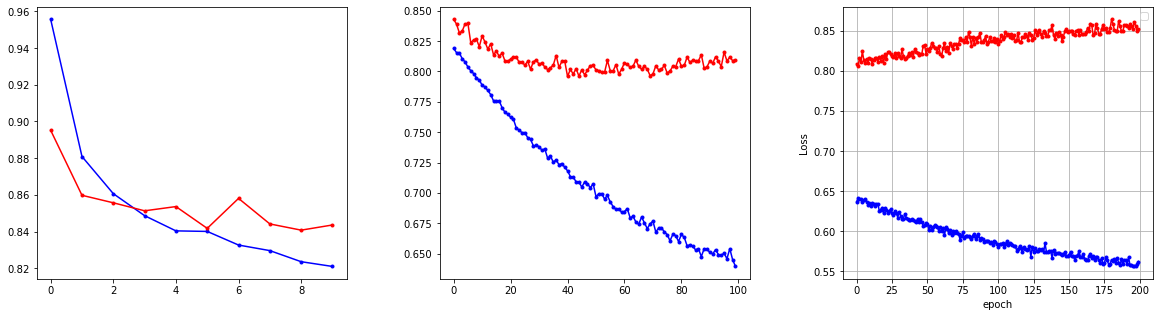

In [25]:
val_loss1 = history1.history['val_loss']
loss1 = history1.history['loss']

val_loss2 = history2.history['val_loss']
loss2 = history2.history['loss']

val_loss3 = history3.history['val_loss']
loss3 = history3.history['loss']

import numpy as np
import matplotlib.pyplot as plt


f, axes = plt.subplots(1, 3)

# 격자 크기 설정
f.set_size_inches((20, 5))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)



x_len1 = np.arange(len(loss1))
axes[0].plot(x_len1, loss1, marker='.', c='blue', label="Train-set loss1.")
axes[0].plot(x_len1, val_loss1, marker='.', c='red', label="Validation-set loss1.")

x_len2 = np.arange(len(loss2))
axes[1].plot(x_len2, loss2, marker='.', c='blue', label="Train-set loss2.")
axes[1].plot(x_len2, val_loss2, marker='.', c='red', label="Validation-set loss2.")

x_len3 = np.arange(len(loss3))
axes[2].plot(x_len3, loss3, marker='.', c='blue', label="Train-set loss3.")
axes[2].plot(x_len3, val_loss3, marker='.', c='red', label="Validation-set loss3.")

plt.legend('')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')


plt.show()